In [1]:
from tqdm import tqdm
from tqdm.contrib.itertools import product

from retsupp.utils.data import Subject, get_subject_ids, get_retinotopic_labels
from itertools import product
from pathlib import Path
import pandas as pd




bids_folder = Path('/data/ds-retsupp')

roi_order = get_retinotopic_labels().values()

In [2]:
df = []

subject_models = list(product(get_subject_ids(), [4, 6]))
keys = []

for subject, model in tqdm(subject_models):

    # sub-01_model-4_prf_voxels.tsv
    # /Users/gdehol/data/ds-retsupp/derivatives/prf_summaries/model4/sub-01/sub-01_model-4_prf_voxels.tsv
    fn = bids_folder / 'derivatives' / 'prf_summaries' / f'model{model}' / f'sub-{subject}' / f'sub-{subject}_model-{model}_prf_voxels.tsv'
    try:
        sub_df = pd.read_csv(fn, sep='\t')
        df.append(sub_df)
        keys.append((subject, model))
    except FileNotFoundError: 
        print(f'File not found: {fn}')
        continue

df = pd.concat(df, keys=keys, names=['subject', 'model'])

 80%|████████  | 48/60 [00:00<00:00, 56.92it/s]

File not found: /data/ds-retsupp/derivatives/prf_summaries/model6/sub-20/sub-20_model-6_prf_voxels.tsv


100%|██████████| 60/60 [00:01<00:00, 45.78it/s]


In [20]:
df = df[df['r2'] > 0.1]

In [ ]:
df['surround_baseline'].describe()

In [51]:
df['surround_baseline'].describe()

count    1.310810e+05
mean     1.388302e-01
std      2.233440e-01
min      2.410574e-07
25%      8.748770e-03
50%      4.070763e-02
75%      1.608576e-01
max      2.856739e+00
Name: surround_baseline, dtype: float64

In [21]:


df['roi1'] = df['roi'].str.split('_').str[0]


df['roi1'] = df['roi1'].map({'LO1':'LO', 'LO2':'LO', 'TO1':'TO', 'TO2':'TO', 'VO1':'VO', 'VO2':'VO', 'V3A':'V3AB', 'V3B':'V3AB'}).fillna(df['roi1'])

roi_order = ['V1', 'V2', 'V3', 'V3AB', 'hV4', 'LO', 'LO', 'TO', 'VO',]

In [37]:
df

roi  voxel         x         y        sd  amplitude  \
subject model                                                                
01      4     35      V1_L     35 -0.911379  0.229420  1.327336  48.745834   
              36      V1_L     36 -1.031278 -0.251407  0.914084  33.003230   
              37      V1_L     37 -0.651723 -0.373003  1.010576  31.912780   
              38      V1_L     38 -0.670895 -0.001585  1.034504  32.734917   
              62      V1_L     62 -0.977115  0.036836  1.472530  29.352514   
...                    ...    ...       ...       ...       ...        ...   
30      6     10371  V3B_R    456  0.346441  0.277490  0.289025        NaN   
              10372  V3B_R    457  0.267123  0.197271  0.336277        NaN   
              10392  V3B_R    477  0.057223  0.307432  0.085199        NaN   
              10393  V3B_R    478  0.375098  0.311796  0.262427        NaN   
              10394  V3B_R    479  0.012152  0.191016  0.044494        NaN   

                     baseline        r2     theta       ecc   srf_size  \
subject model                                                            
01      4     35    -0.256373  0.301980  2.894988  0.939812  15.079287   
              36    -0.031939  0.180566 -2.902474  1.061480  12.167911   
              37    -0.044516  0.252188 -2.621765  0.750916  14.124476   
              38    -0.089372  0.392633 -3.139229  0.670897  13.295797   
              62    -0.061057  0.291765  3.103912  0.977809  12.562336   
...                       ...       ...       ...       ...        ...   
30      6     10371       NaN  0.208602  0.675334  0.443872   1.072964   
              10372       NaN  0.281955  0.636103  0.332070   8.524906   
              10392       NaN  0.243934  1.386771  0.312712  16.837170   
              10393       NaN  0.166043  0.693500  0.487765   1.068018   
              10394       NaN  0.113085  1.507265  0.191402   1.724953   

                     srf_amplitude  hrf_delay  hrf_dispersion  rf_amplitude  \
subject model                                                                 
01      4     35          0.194965   6.256988        1.303827           NaN   
              36          0.153650   4.147380        1.984457           NaN   
              37          0.179758   5.626205        1.521950           NaN   
              38          0.165007   6.055808        0.871213           NaN   
              62          0.320854   5.112639        0.913019           NaN   
...                            ...        ...             ...           ...   
30      6     10371       0.015228   4.957429        0.305501     32.241560   
              10372       0.034845   5.008184        0.306162     18.403576   
              10392       0.030790   5.029526        0.864938     21.018490   
              10393       0.031032   4.974320        0.303226     26.000046   
              10394       0.057744   4.973928        0.305467     17.874748   

                     neural_baseline  surround_baseline  bold_baseline  roi1  
subject model                                                                 
01      4     35                 NaN                NaN            NaN    V1  
              36                 NaN                NaN            NaN    V1  
              37                 NaN                NaN            NaN    V1  
              38                 NaN                NaN            NaN    V1  
              62                 NaN                NaN            NaN    V1  
...                              ...                ...            ...   ...  
30      6     10371         0.503761           0.009444      -0.042578  V3AB  
              10372         5.101319           0.659443       0.008184  V3AB  
              10392         0.012480           0.006619       0.029528  V3AB  
              10393         0.111988           0.004381      -0.025682  V3AB  
              10394         0.005227           0.007191      -0.02607

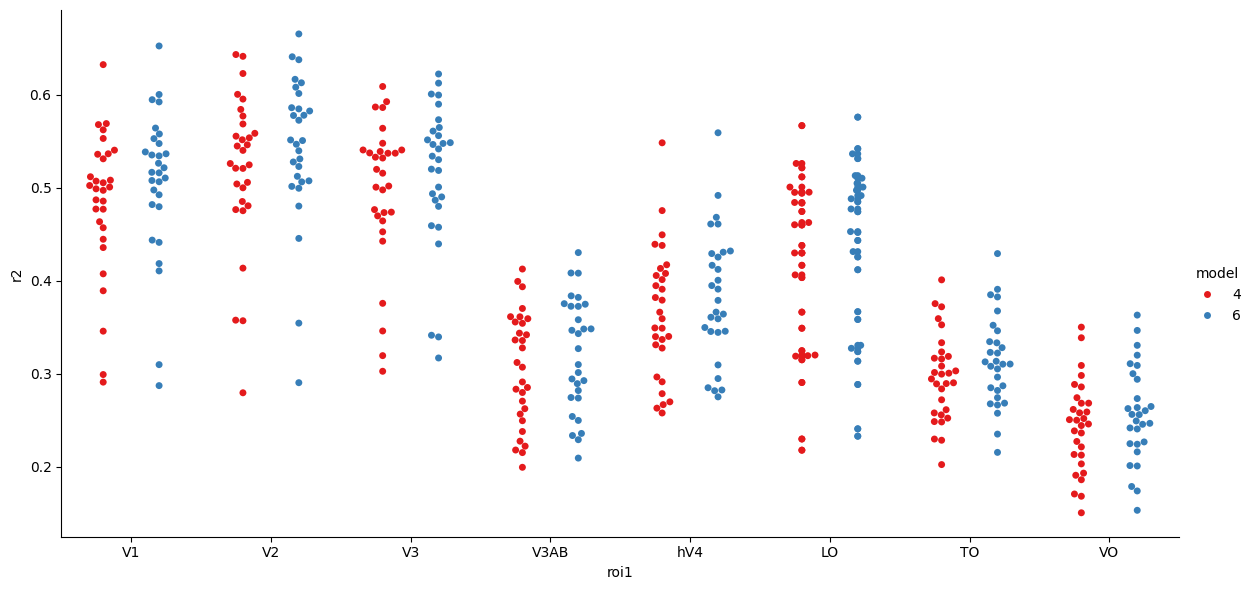

In [22]:
import seaborn as sns
sns.catplot(x='roi1', y='r2', hue='model', data=df.groupby(['subject', 'roi1', 'model'])[['r2']].mean().reset_index(), kind='swarm', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

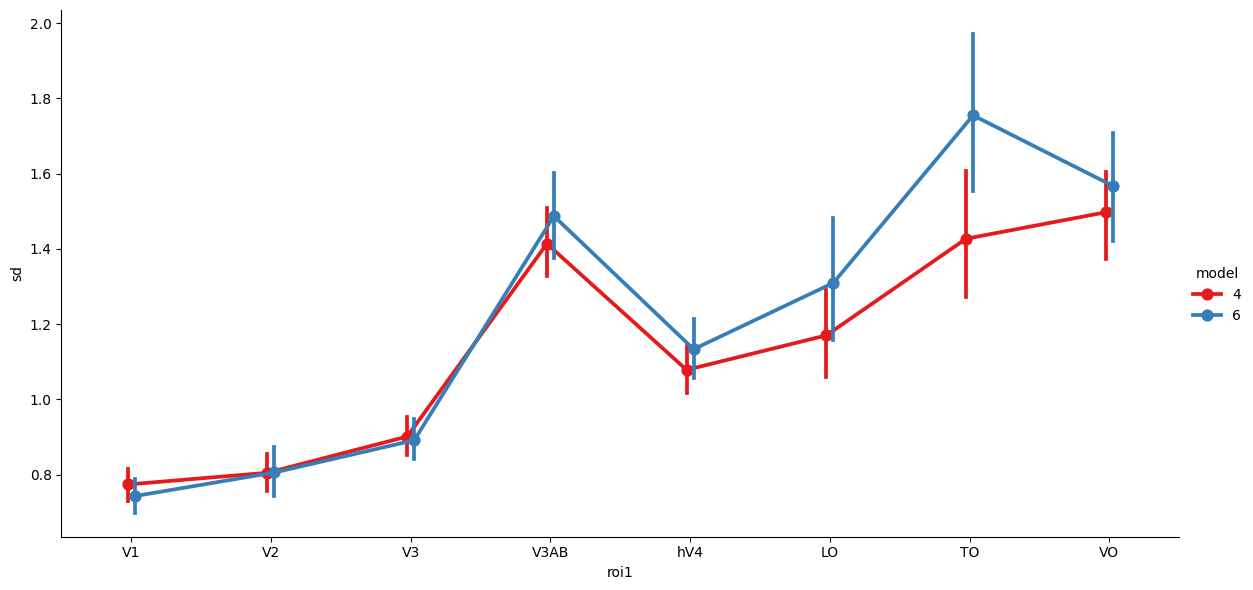

In [23]:
sns.catplot(x='roi1', y='sd', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['sd']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

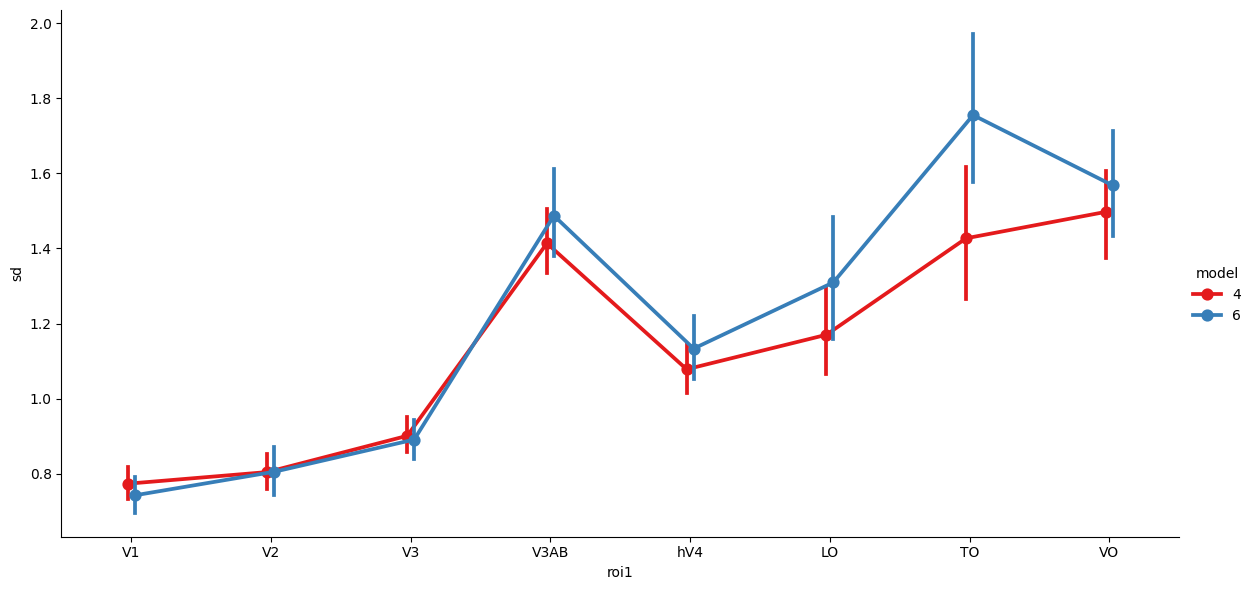

In [6]:
sns.catplot(x='roi1', y='sd', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['sd']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

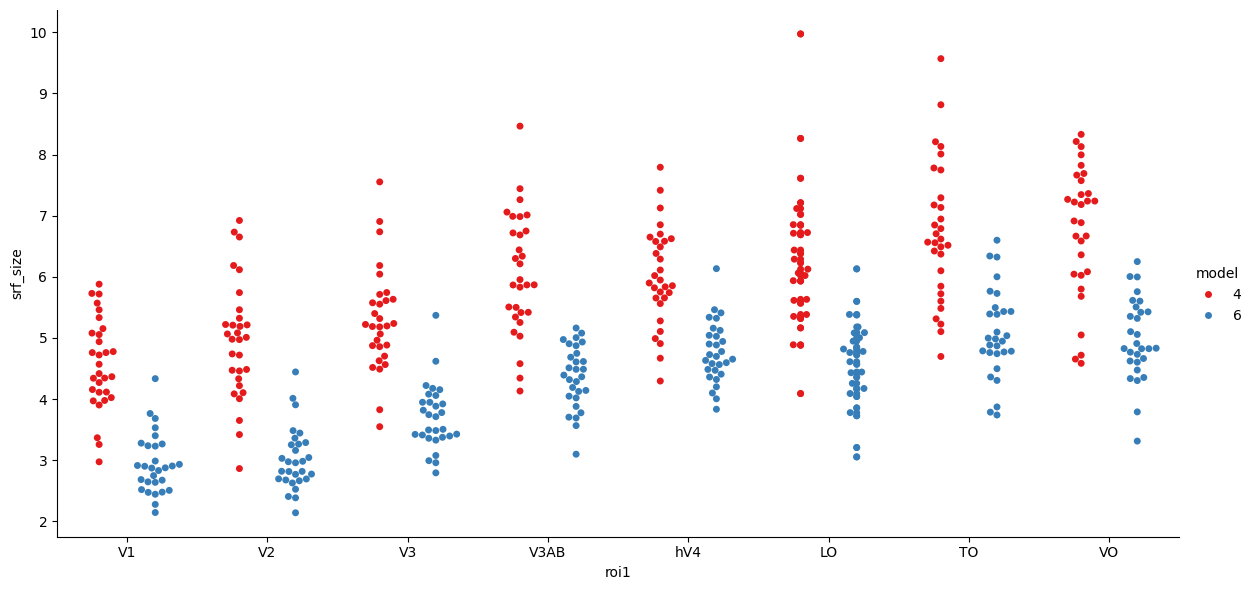

In [7]:
sns.catplot(x='roi1', y='srf_size', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['srf_size']].mean().reset_index(), kind='swarm', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

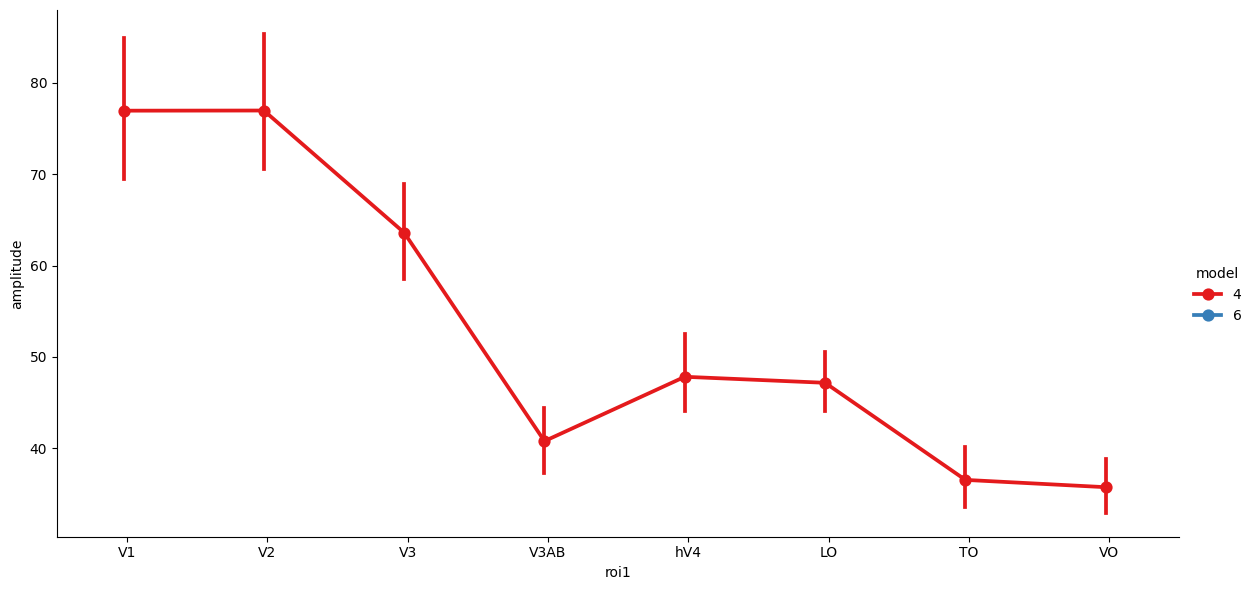

In [25]:
sns.catplot(x='roi1', y='amplitude', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['amplitude']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

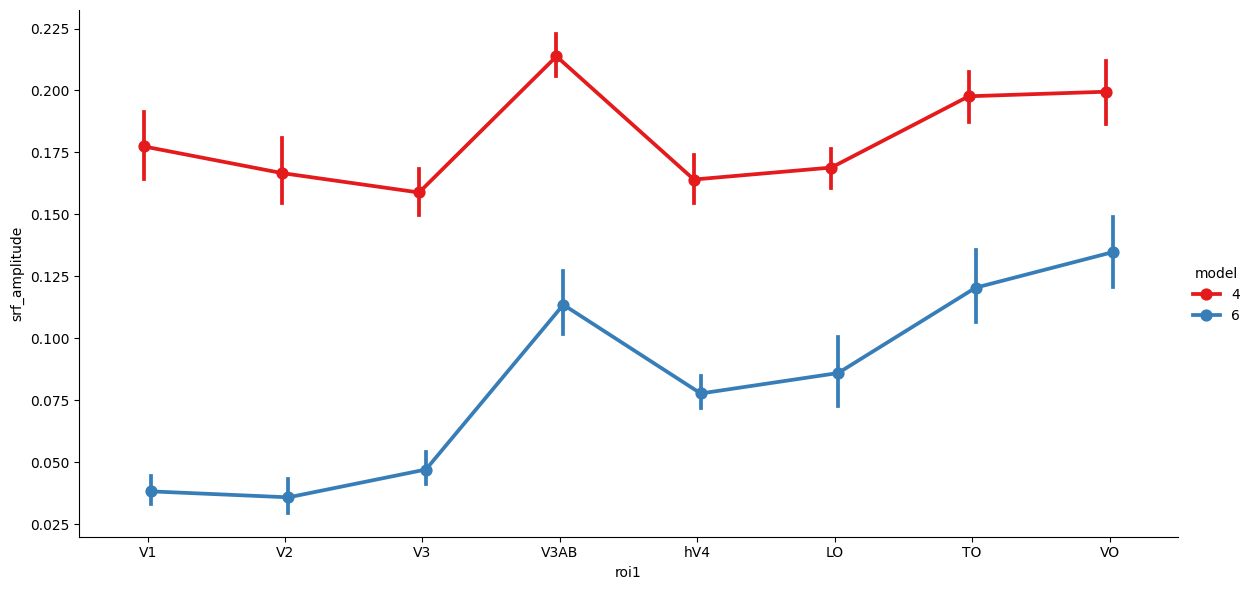

In [26]:
sns.catplot(x='roi1', y='srf_amplitude', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['srf_amplitude']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

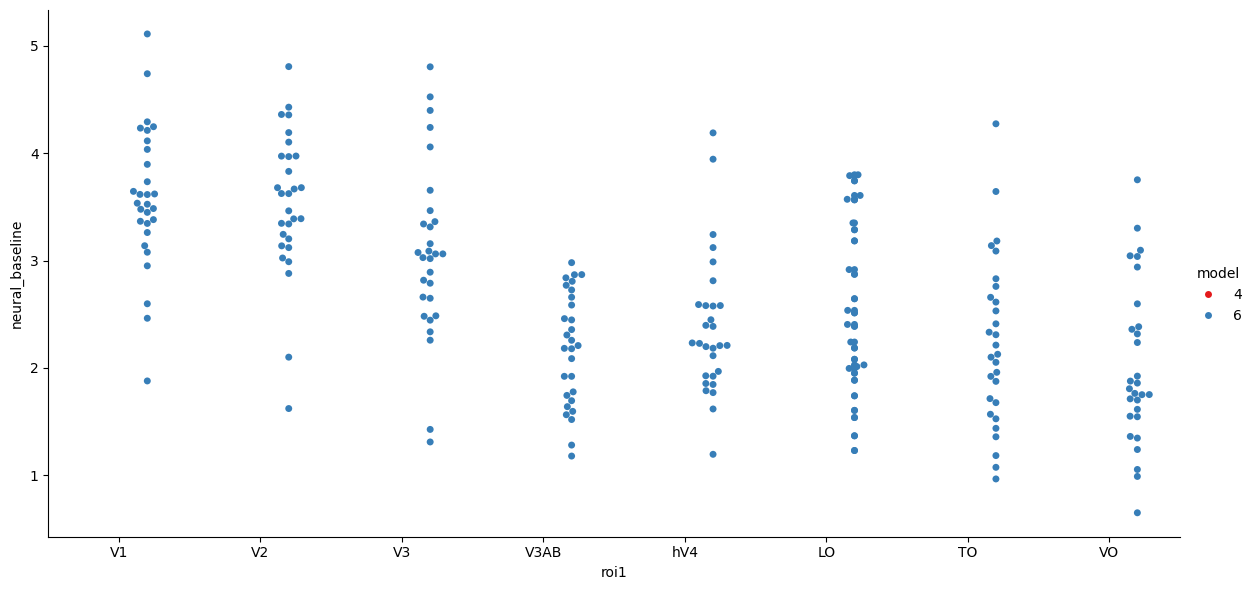

In [27]:
sns.catplot(x='roi1', y='neural_baseline', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['neural_baseline']].mean().reset_index(), kind='swarm', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order)

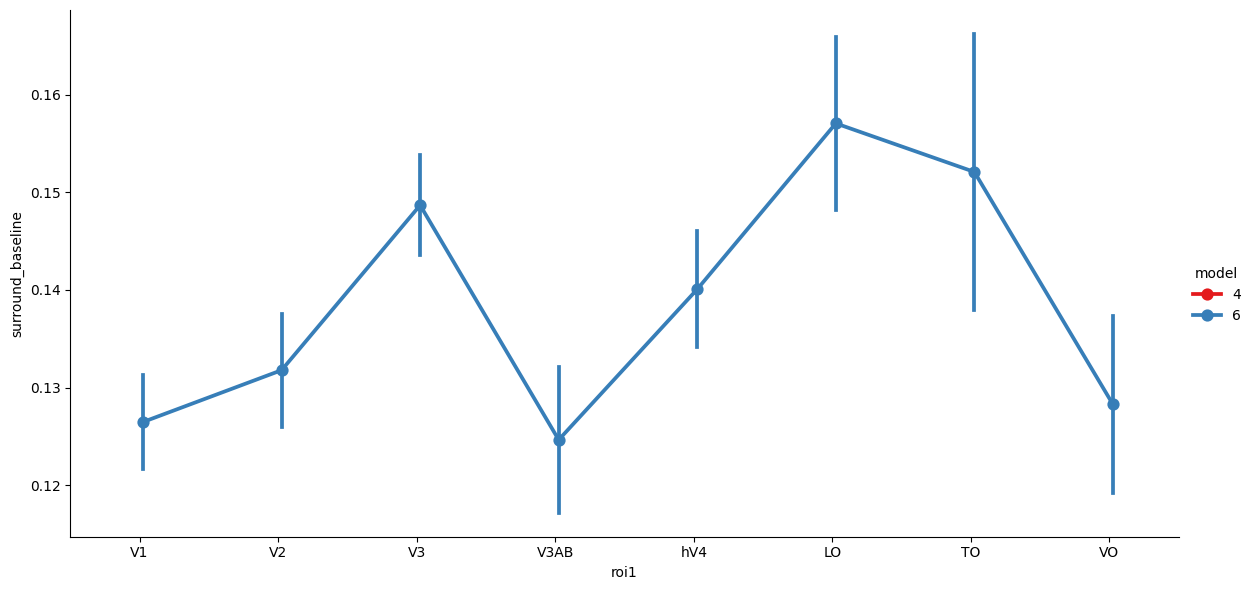

In [29]:
sns.catplot(x='roi1', y='surround_baseline', hue='model', data=df.groupby(['subject', 'roi1', 'model',])[['surround_baseline']].mean().reset_index(), kind='point', height=6, aspect=2, dodge=True, palette='Set1', order=roi_order,
errorbar='se')

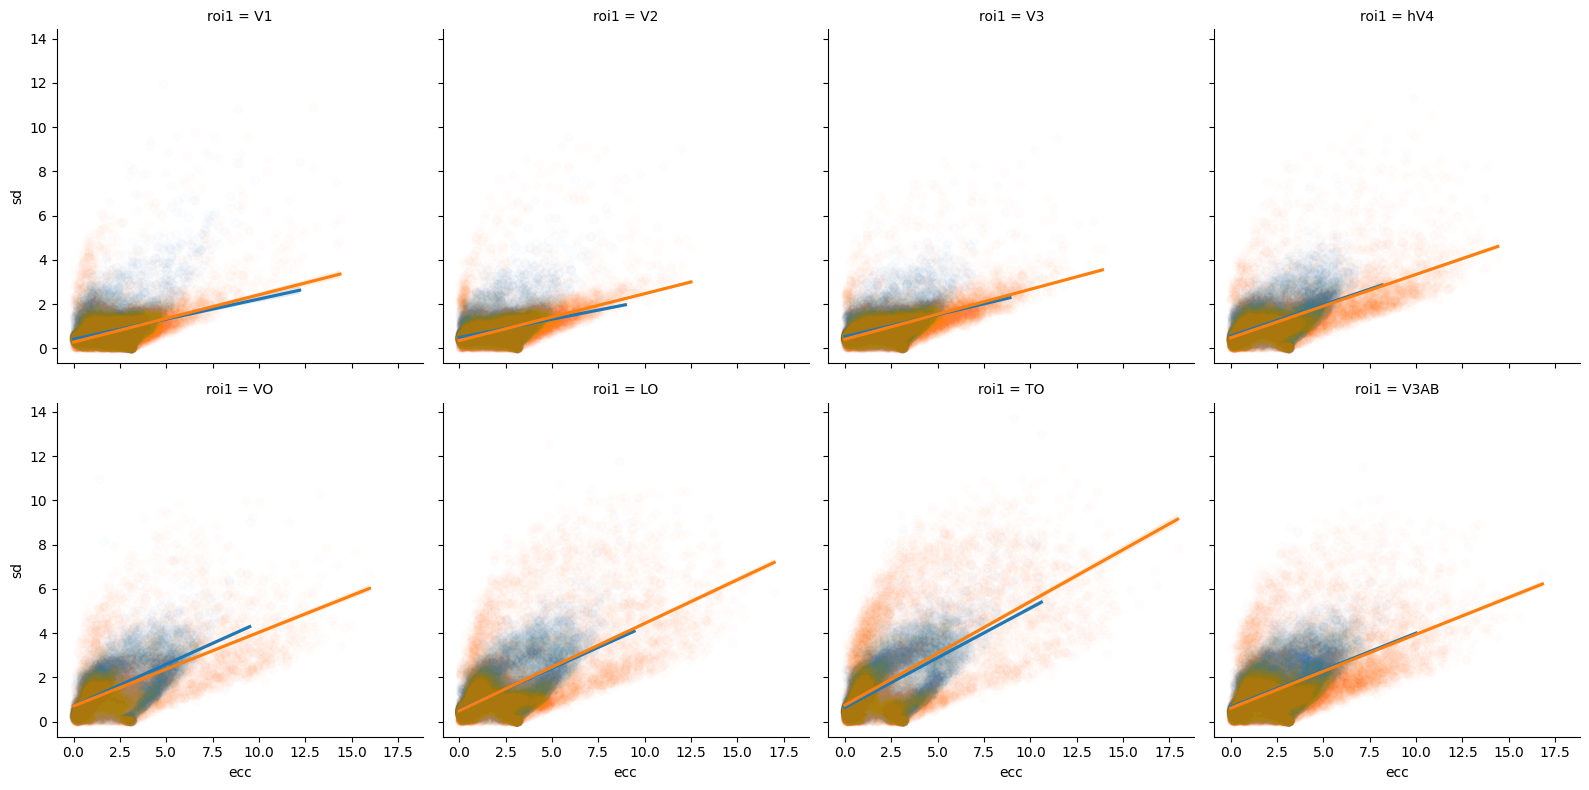

In [30]:
g = sns.FacetGrid(df.reset_index(), col="roi1", hue="model", height=4, aspect=1, col_wrap=4)

g.map(sns.regplot, "ecc", "sd", scatter_kws={'alpha':0.01})

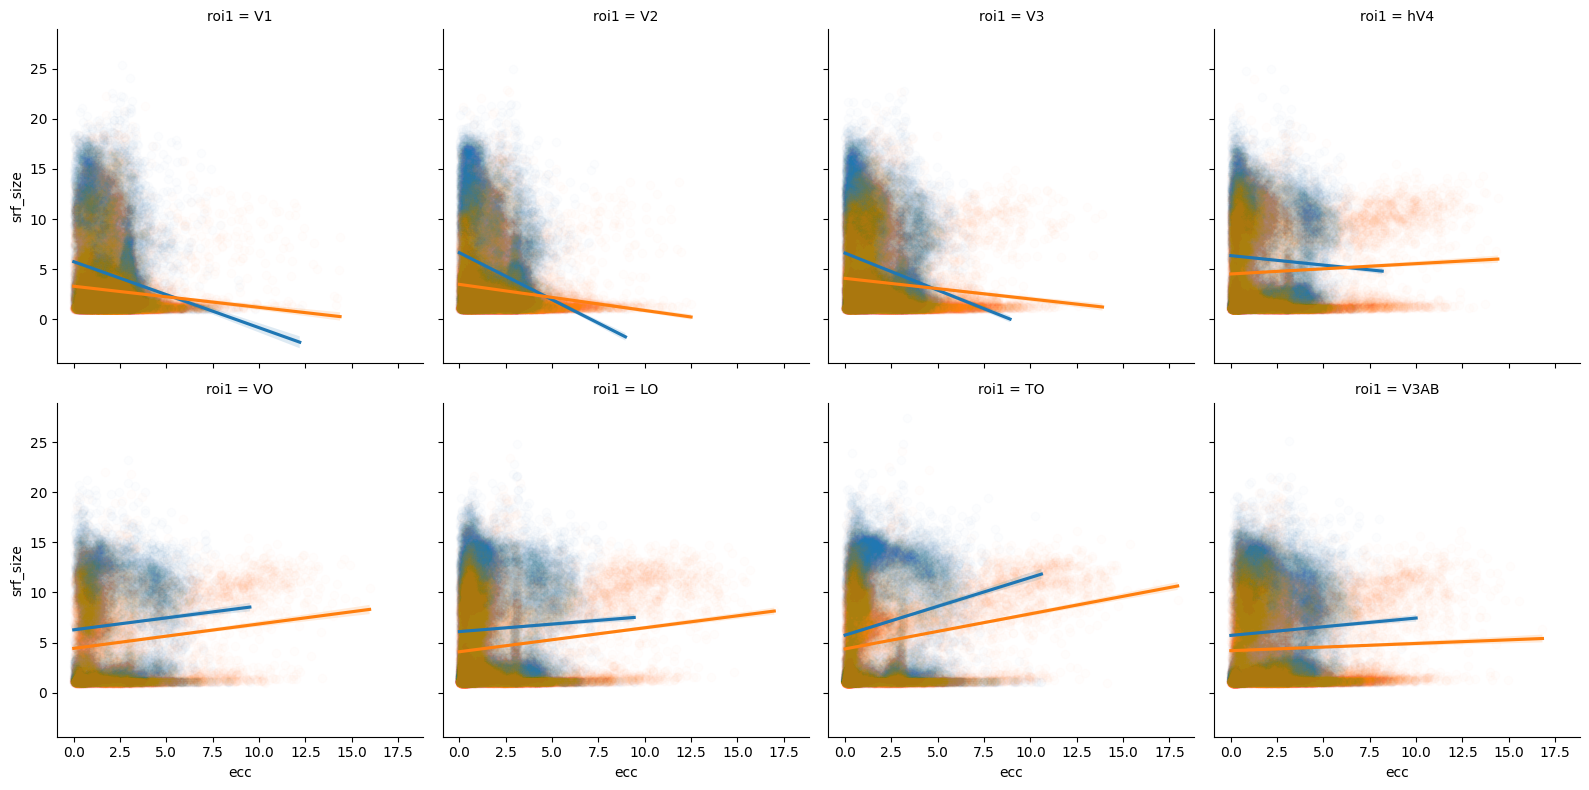

In [31]:
g = sns.FacetGrid(df.reset_index(), col="roi1", hue="model", height=4, aspect=1, col_wrap=4)

g.map(sns.regplot, "ecc", "srf_size", scatter_kws={'alpha':0.01})

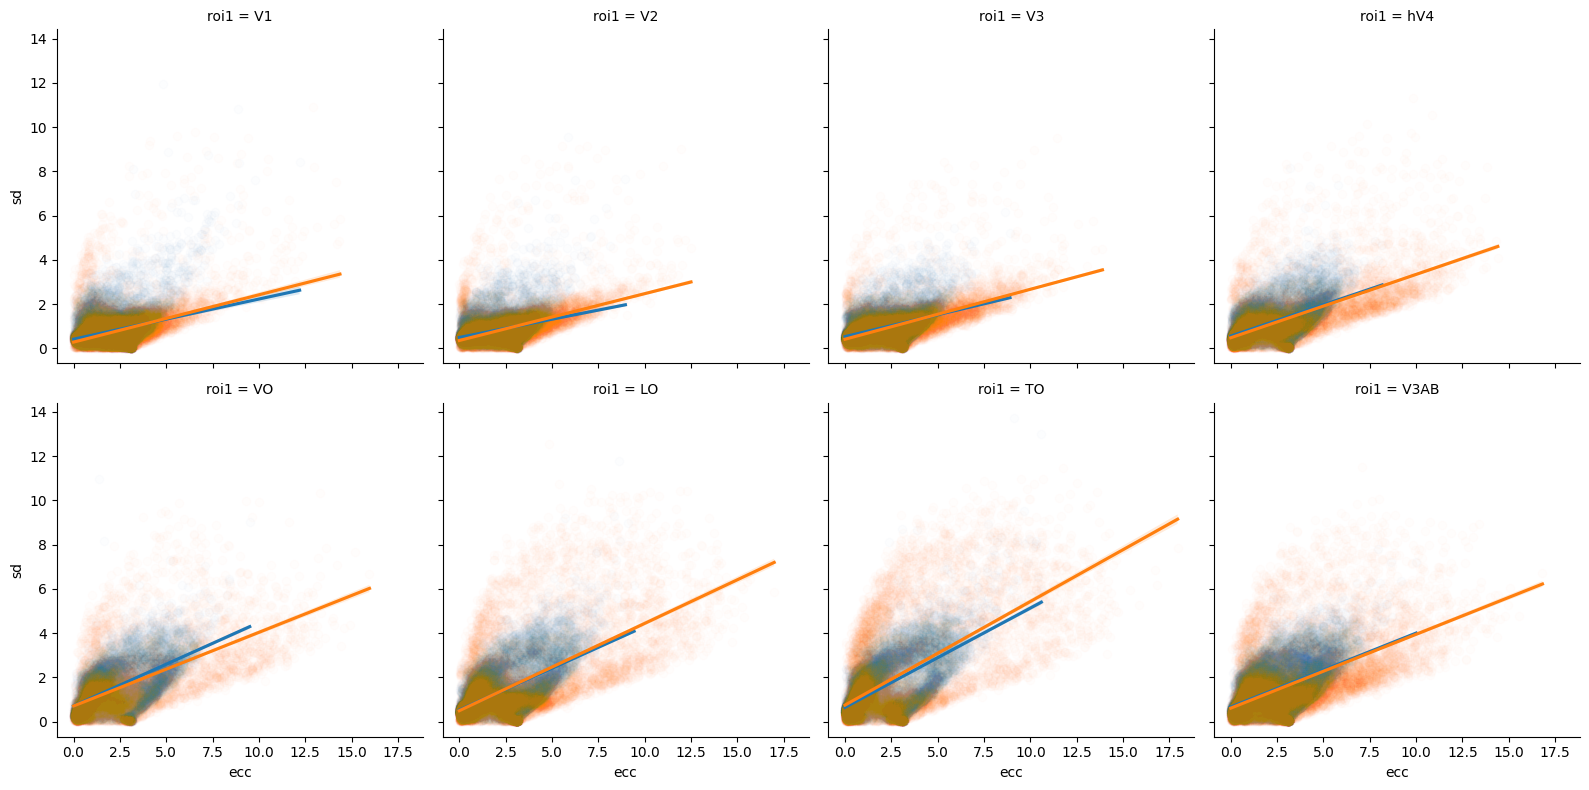

In [32]:
g = sns.FacetGrid(df.reset_index(), col="roi1", hue="model", height=4, aspect=1, col_wrap=4)

g.map(sns.regplot, "ecc", "sd", scatter_kws={'alpha':0.01})

(-3.0, 3.0)

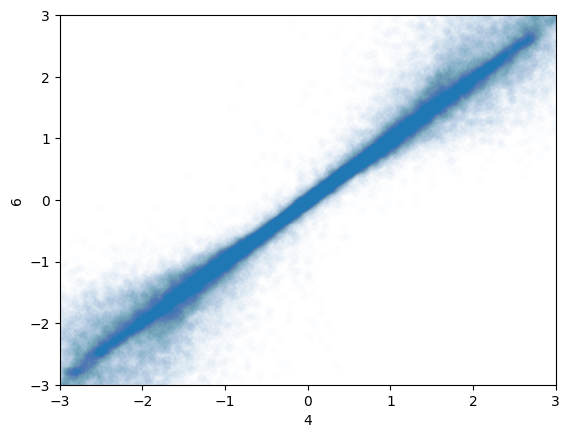

In [33]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['x'][4], y=tmp['x'][6], alpha=0.01)

plt.xlim(-3, 3)
plt.ylim(-3, 3)

(0.0, 3.0)

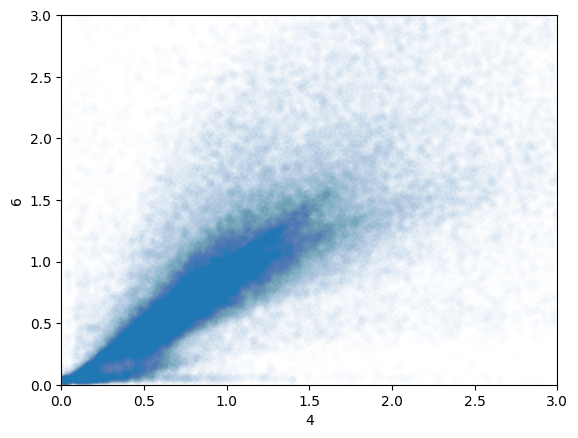

In [34]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['sd'][4], y=tmp['sd'][6], alpha=0.01)

plt.xlim(0, 3)
plt.ylim(0, 3)

(0.0, 5.0)

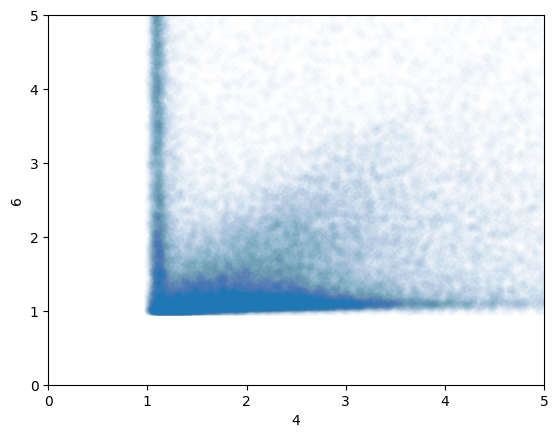

In [35]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['srf_size'][4], y=tmp['srf_size'][6], alpha=0.01)

plt.xlim(0, 5)
plt.ylim(0, 5)

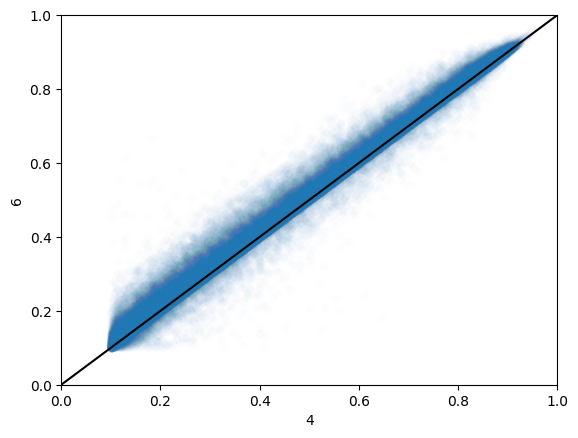

In [36]:
import matplotlib.pyplot as plt
tmp = df.set_index(['roi', 'voxel'], append=True).droplevel(2).unstack(['model'])


sns.scatterplot(x=tmp['r2'][4], y=tmp['r2'][6], alpha=0.01)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline(xy1=(0,0 ), slope=1, color='k', linestyle='-')

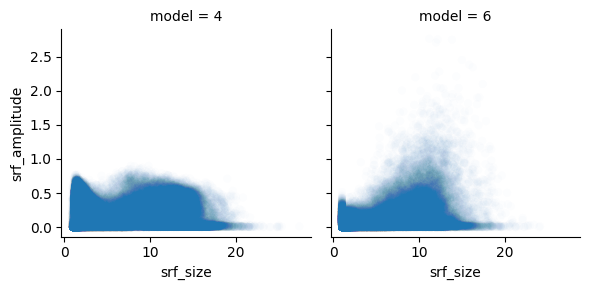

In [19]:
g = sns.FacetGrid(df.reset_index(),col='model', )

g.map_dataframe(sns.scatterplot, x='srf_size', y='srf_amplitude', edgecolor='none', alpha=0.01)

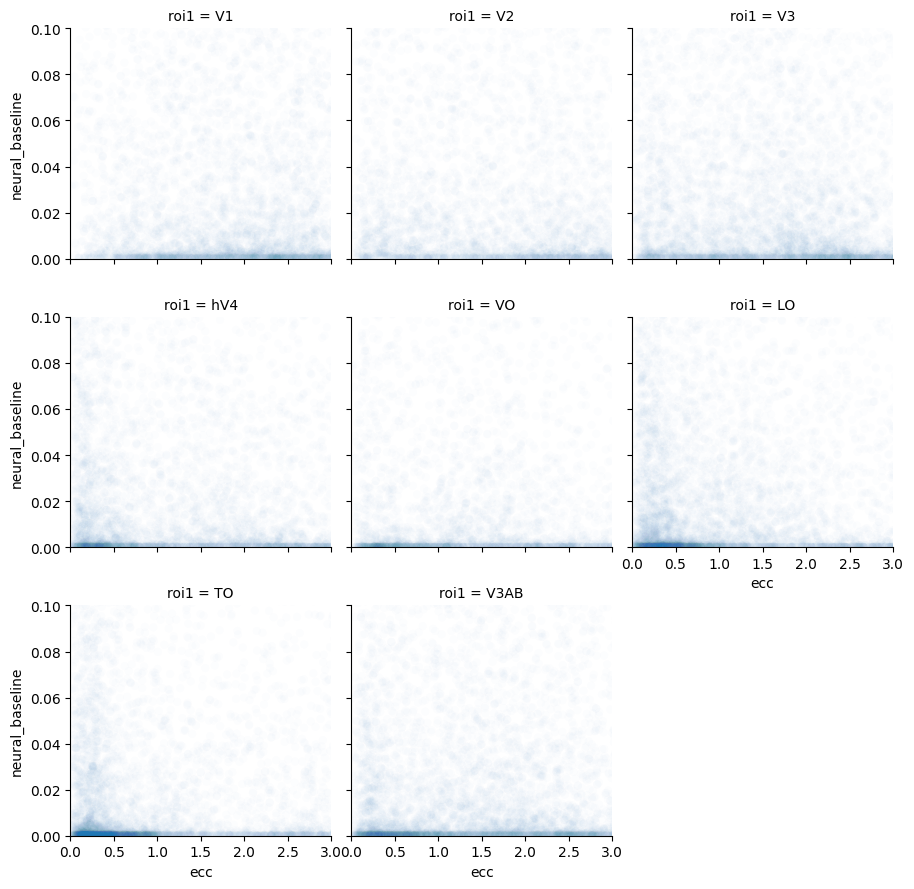

In [48]:
g = sns.FacetGrid(df[df.r2 > 0.1].query('model == 6').reset_index(),col='roi1', col_wrap=3)
g.map_dataframe(sns.scatterplot, x='ecc', y='neural_baseline', alpha=0.01, edgecolor='none')

g.set(xlim=(0, 3), ylim=(0, .1))